In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
#%%
#LIBRARIES
#Custom Library Connection
import sys
import os

#Data Processing
import pandas as pd
import numpy as np
import math

import datetime

#Table Formatter
from google.colab.data_table import DataTable
DataTable.max_columns = 50

#Plots
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns

In [42]:

#%%
#Reading Data from CSV 
path="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole.csv"
df = pd.read_csv(path)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,21,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,105041,2872635,748994,748994,NaN,NaN,NaN,NaN,Set User ID,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
1,105042,2872636,748994,Home,53.0,Load Agenda from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:24 +0000,Load Agenda from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
2,105044,2872637,748994,Home,7.0,Load HomePage KPI from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load HomePage KPI from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
3,105045,2872638,748994,Contacts,4.0,Load contacts GDP from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load contacts GDP from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
4,105046,2872639,748994,Home,968.0,Load Tasks from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:25 +0000,Load Tasks from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474937,1470945,4347572,672590,Home,5668.0,Load Tasks from service,2022-02-28 23:59:35 +0000,2022-02-28 23:59:41 +0000,Load Tasks from service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474938,1470943,4347573,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,NaN,401.0,Http failure response for https://apigateway.g...,NaN,2022-02-28,23,Monday,-2
1474939,1470946,4347574,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,SafeClockPianoAzioneService-pdaRequest,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474940,1470948,4347575,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,Forbidden,/kpi/detail/5,DashboardDetailService-createLogFn,403.0,No message available,java.lang.reflect.UndeclaredThrowableException,2022-02-28,23,Monday,-2


In [43]:
df['cdf'] = df["Memoria Usata"].rank(method = 'average', pct = True)
df[["cdf", "Memoria Usata"]]

,cdf,Memoria Usata
0,0.339078,56.86
1,0.352319,57.89
2,0.362101,58.55
3,0.435693,63.83
4,0.439843,64.02
...,...,...
1474937,0.142322,41.81
1474938,0.245289,49.27
1474939,0.245487,49.28
1474940,0.245894,49.31


In [44]:
df.loc[df['cdf'] == min(df[df["cdf"]>0.9].cdf)]["Memoria Usata"]

17764      110.81
18104      110.81
18105      110.81
18106      110.81
40156      110.81
            ...  
1413844    110.81
1413845    110.81
1413846    110.81
1413847    110.81
1445700    110.81
Name: Memoria Usata, Length: 72, dtype: float64

In [45]:
df["label"] = [1 if df.iloc[i].cdf>0.9 else 0 for i in range(len(df))]

# Encode

In [46]:
cat_columns = df.select_dtypes([ 'object','string']).columns
cat_columns

Index(['Event Name', 'Nome Componente', 'Inizio Caricamento',
       'Fine Caricamento', 'Descrizione Evento', 'Stack Trace', 'Tipo Evento',
       'SO', 'Device ID', 'App Version', 'Priorita', 'Timestamp', 'Tipo Rete',
       'Errore', 'Path Errore', 'Custom Field Errore', 'Messaggio Errore',
       'Exception', 'date', 'day_name'],
      dtype='object')

In [47]:
df.head()

,Unnamed: 0,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,...,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag,cdf,label
0,105041,2872635,748994,748994,NaN,NaN,NaN,NaN,Set User ID,NaN,...,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2,0.339078,0
1,105042,2872636,748994,Home,53.0,Load Agenda from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:24 +0000,Load Agenda from storage,NaN,...,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2,0.352319,0
2,105044,2872637,748994,Home,7.0,Load HomePage KPI from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load HomePage KPI from storage,NaN,...,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2,0.362101,0
3,105045,2872638,748994,Contacts,4.0,Load contacts GDP from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load contacts GDP from storage,NaN,...,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2,0.435693,0
4,105046,2872639,748994,Home,968.0,Load Tasks from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:25 +0000,Load Tasks from storage,NaN,...,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2,0.439843,0


In [48]:
for i in cat_columns:
  df[i] = pd.factorize( df[i] )[0]

In [49]:
df.head()

,Unnamed: 0,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,...,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag,cdf,label
0,105041,2872635,748994,0,NaN,-1,-1,-1,0,-1,...,-1,NaN,-1,-1,0,0,0,-2,0.339078,0
1,105042,2872636,748994,1,53.0,0,0,0,1,-1,...,-1,NaN,-1,-1,0,0,0,-2,0.352319,0
2,105044,2872637,748994,1,7.0,1,1,1,2,-1,...,-1,NaN,-1,-1,0,0,0,-2,0.362101,0
3,105045,2872638,748994,2,4.0,2,1,1,3,-1,...,-1,NaN,-1,-1,0,0,0,-2,0.435693,0
4,105046,2872639,748994,1,968.0,3,0,1,4,-1,...,-1,NaN,-1,-1,0,0,0,-2,0.439843,0


In [55]:
df_tmp = df.fillna(0)

In [56]:
X_numeric = df_tmp[df_tmp.columns.difference(['label', 'Timestamp'])]
X_cat = df_tmp[["Timestamp"]]
y = df_tmp[["label"]]

In [57]:
graph = pd.concat([X_numeric, y],axis=1).corr().style.background_gradient(sns.light_palette('green', as_cmap=True))


In [58]:
from sklearn.feature_selection import f_regression

F_score, p_value = f_regression(X_numeric, y)
df_fscore = pd.DataFrame(list(zip(X_numeric.columns, F_score, p_value)), 
                  columns=['feature', 'F-score', 'p-value'])
df_fscore.set_index('feature')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


,F-score,p-value
feature,,
App Version,1.038175e+05,0.000000e+00
Compromesso,6.643785e+02,1.797611e-146
Custom Field Errore,3.773648e+03,0.000000e+00
Descrizione Evento,1.516006e+04,0.000000e+00
Device ID,3.677932e+02,5.790138e-82
Elapsed Time,4.730729e+00,2.962849e-02
Errore,5.844585e+03,0.000000e+00
Event Name,2.651884e+04,0.000000e+00
Exception,5.173073e+03,0.000000e+00


In [59]:
def plot_correlation(data, method):
    fig, ax = plt.subplots(figsize=(60, 60))
    sns.set(font_scale=5)
    correlation_matrix = data.corr(method=method, min_periods=1)
    sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.show()

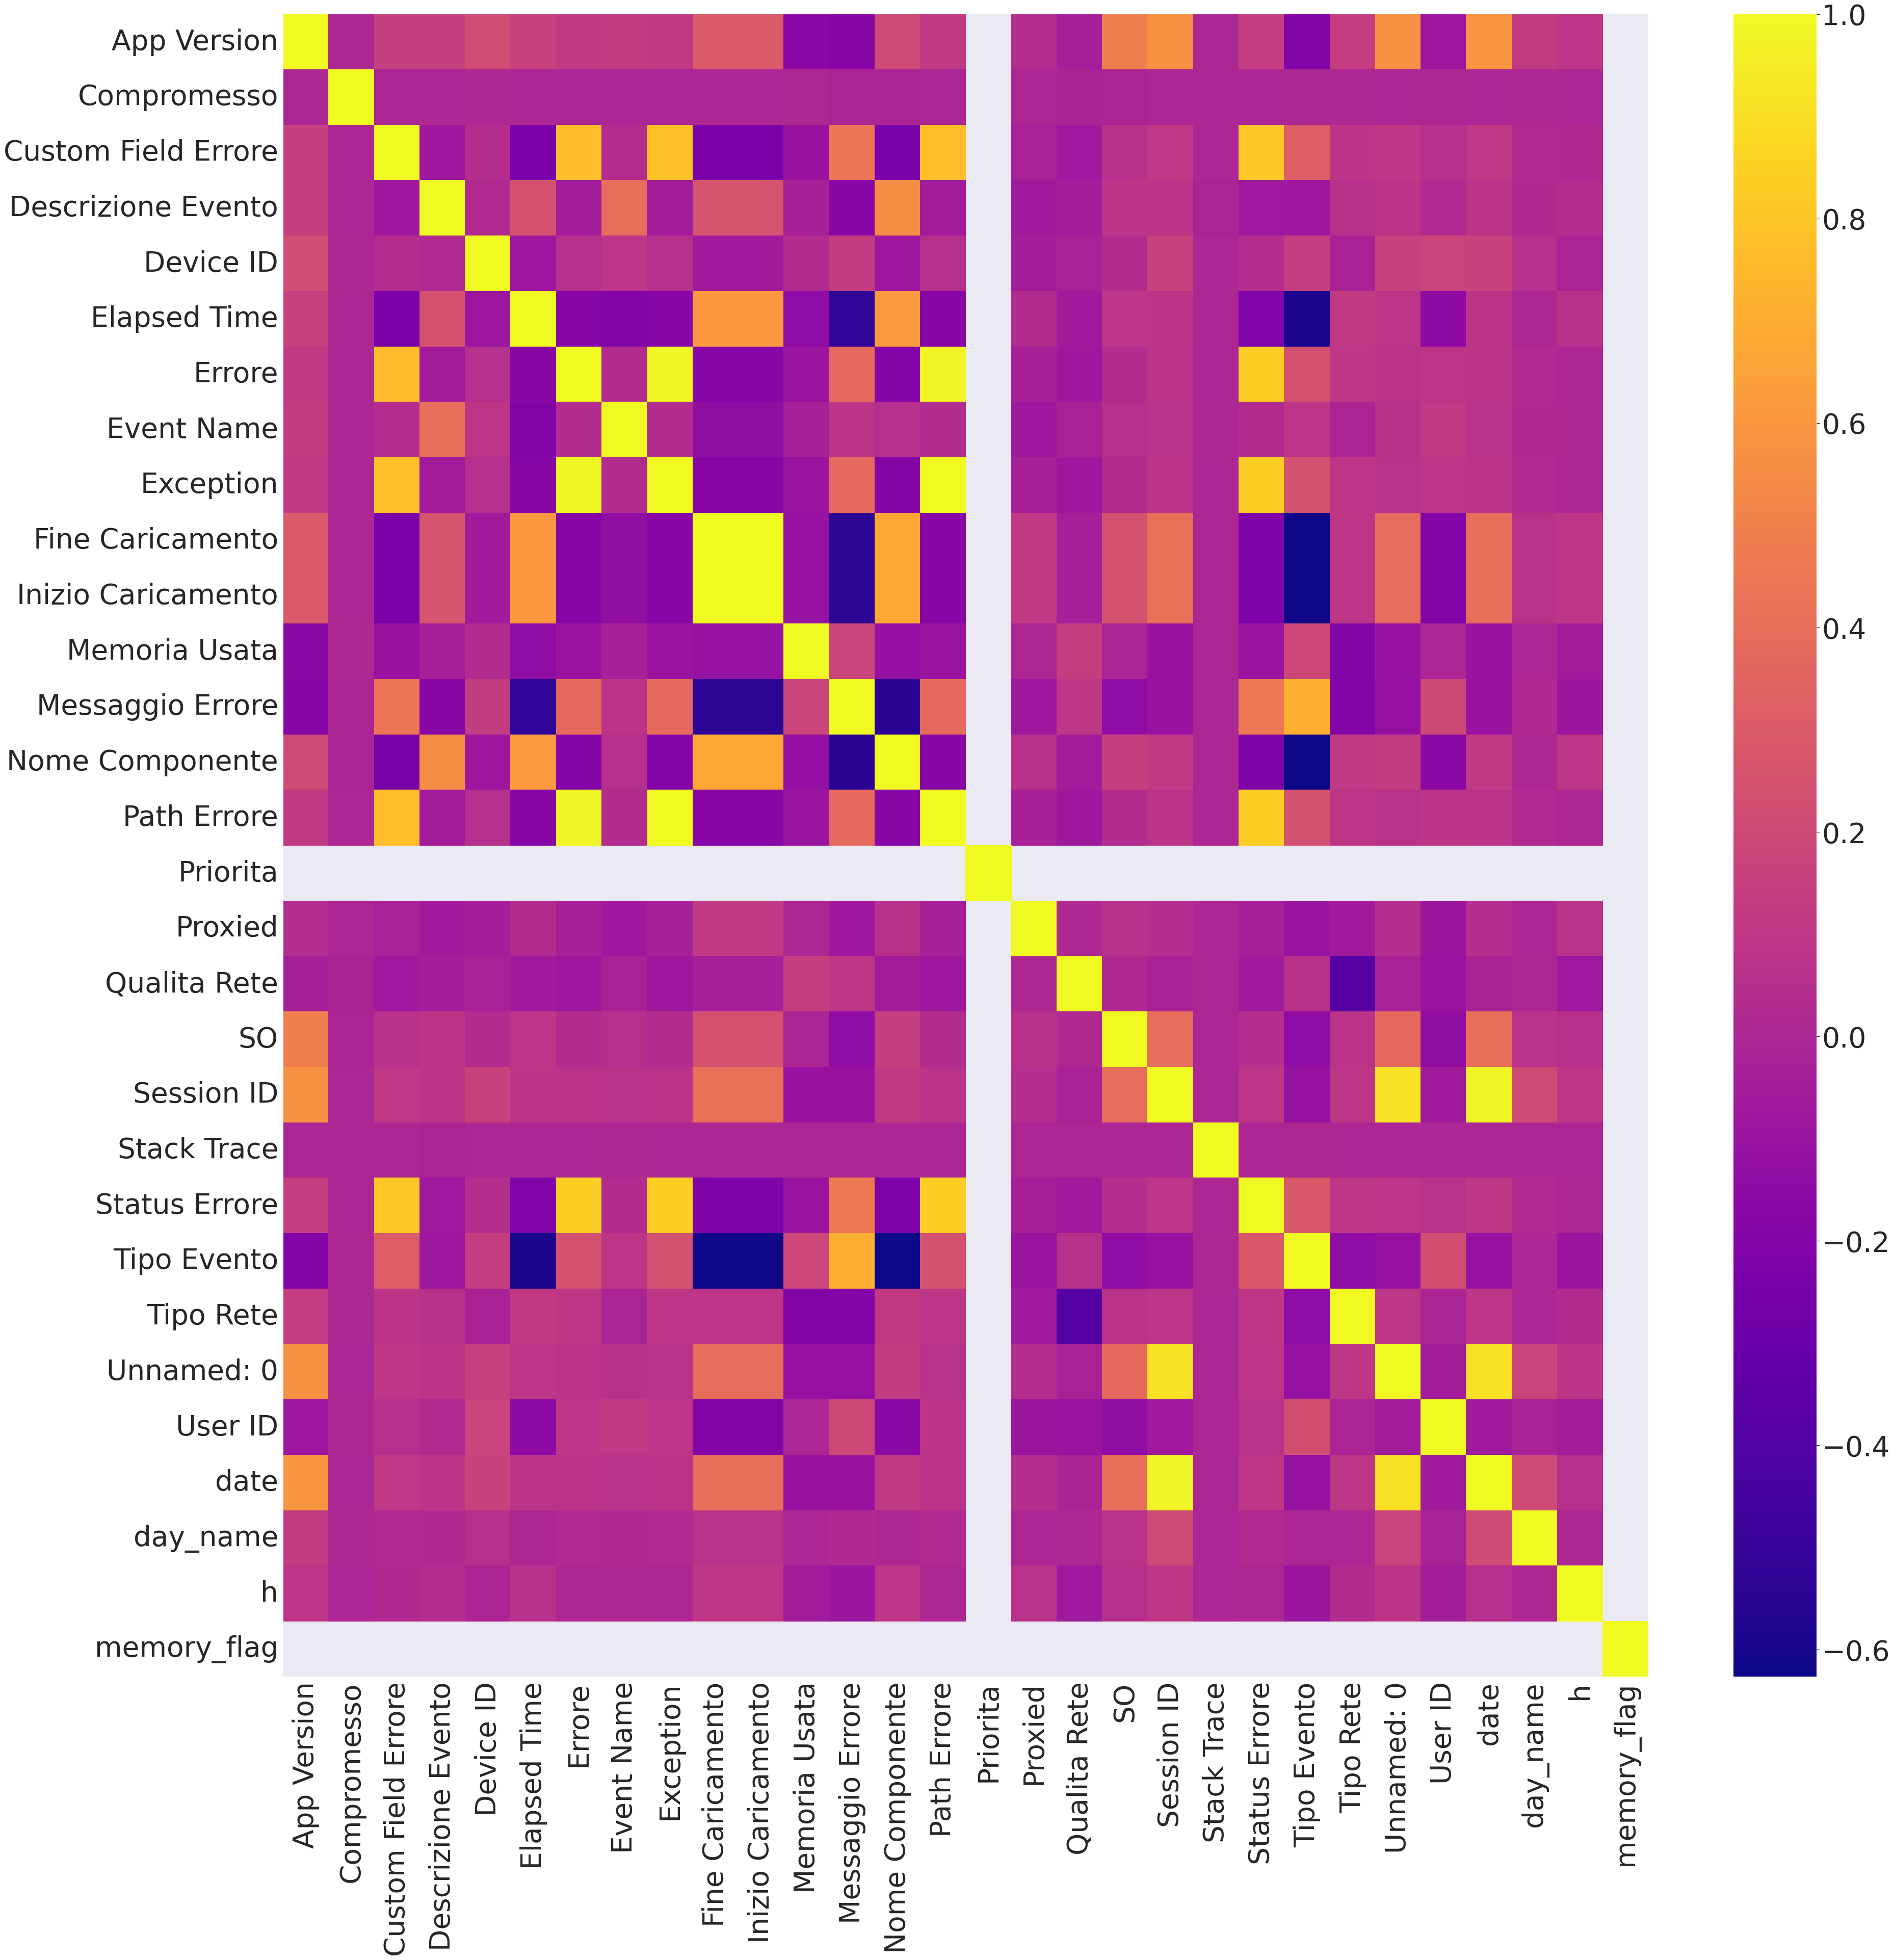

In [62]:
plot_correlation(df_tmp[df_tmp.columns.difference([ 'Timestamp', "cdf", "label"])], 'kendall')

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[["SO","Tipo Evento", "day_name"]]=df[["SO","Tipo Evento", "day_name"]].apply(encoder.fit_transform)
